/Users/dongpingping/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2,8,9,14,25,131,132,133,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(38636, 34)
SID                    0
ISO_TIME               0
LON                    0
LAT                    0
STORM_SPEED            0
DIST2LAND              0
TRACK_TYPE             0
STORM_DIR              0
NATURE                 0
SUBBASIN               0
BASIN                  0
LANDFALL             552
USA_WIND            6669
TOKYO_R30_DIR       7698
TOKYO_GRADE         7698
TOKYO_R50_DIR       7698
TOKYO_PRES          7784
USA_POCI           13524
USA_ROCI           13577
USA_RMW            13612
HKO_CAT            14744
TOKYO_R30_LONG     19644
TOKYO_R30_SHORT    19650
USA_R34_NE         21009
USA_R34_SE         21065
USA_R34_NW         21077
USA_R34_SW         21180
TOKYO_LAND         21498
TOKYO_R50_LONG     28192
TOKYO_R50_SHORT    28208
USA_R50_NE         29474
USA_R50_SE         29486
USA_R50_NW         29514
USA_R50_SW         29526
dtype: int64


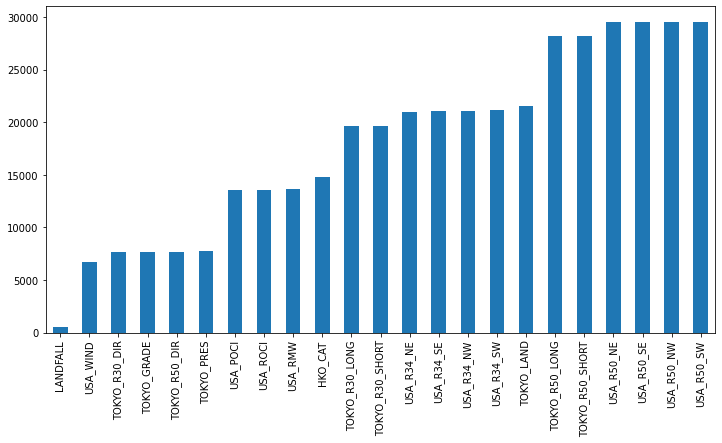

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime
import missingno as msno
import matplotlib.pyplot as plt
# 显示所有列
pd.set_option('display.max_columns', None)

# 显示所有行
pd.set_option('display.max_rows', None)

# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 100)
file = '../../dataset/ibtracs.WP.list.v04r00.csv'

data = pd.read_csv(file)

# data = data[['SID', 'BASIN', 'SUBBASIN', 'ISO_TIME','NATURE', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY', 'DIST2LAND', 'LANDFALL',
#               'USA_AGENCY','USA_R34_NE','USA_R34_SE',"USA_R34_SW",'USA_R34_NW','USA_R50_NE','USA_R50_SE','USA_R50_SW','USA_R50_NW',
#              'USA_POCI','USA_ROCI','USA_RMW','USA_EYE','TOKYO_R50_DIR','TOKYO_R50_LONG','TOKYO_R50_SHORT','TOKYO_R30_DIR',
#              'TOKYO_R30_LONG','TOKYO_R30_SHORT','TOKYO_LAND','STORM_SPEED','STORM_DIR'
# ]]
# data = data[['SID', 'ISO_TIME','LON', 'LAT','STORM_SPEED', 'DIST2LAND', 'TRACK_TYPE', 
#        'STORM_DIR',   'NATURE', 'SUBBASIN',
#        'BASIN', 'LANDFALL', 'USA_SSHS', 'USA_ATCF_ID','USA_WIND', 'TOKYO_R30_DIR', 'TOKYO_GRADE', 'TOKYO_R50_DIR',
#        'TOKYO_PRES',  'USA_STATUS', 'CMA_CAT',
#        'USA_PRES',  'CMA_PRES', 'CMA_WIND', 'USA_POCI',
#        'USA_ROCI', 'USA_RMW', 'HKO_CAT', 'HKO_WIND', 'HKO_PRES',
#         'TOKYO_R30_LONG', 'TOKYO_WIND', 'TOKYO_R30_SHORT',
#        'USA_R34_NE', 'USA_R34_SE', 'USA_R34_NW', 'USA_R34_SW', 'TOKYO_LAND',
#        'WMO_AGENCY', 'WMO_PRES', 'USA_AGENCY', 'WMO_WIND', 'TOKYO_R50_LONG',
#        'TOKYO_R50_SHORT', 'USA_R50_NE', 'USA_R50_SE', 'USA_R50_NW',
#        'USA_R50_SW']]
data = data[['SID', 'ISO_TIME','LON', 'LAT','STORM_SPEED', 'DIST2LAND', 'TRACK_TYPE', 'STORM_DIR', 'NATURE', 'SUBBASIN','BASIN', 'LANDFALL', 'USA_WIND', 'TOKYO_R30_DIR', 'TOKYO_GRADE', 'TOKYO_R50_DIR','TOKYO_PRES', 'USA_POCI','USA_ROCI', 'USA_RMW', 'HKO_CAT', 'TOKYO_R30_LONG', 
             'TOKYO_R30_SHORT', 'USA_R34_NE', 'USA_R34_SE', 'USA_R34_NW', 'USA_R34_SW', 'TOKYO_LAND',  'TOKYO_R50_LONG', 'TOKYO_R50_SHORT', 'USA_R50_NE', 'USA_R50_SE', 'USA_R50_NW','USA_R50_SW']]
data = data[1:]
data['ISO_TIME'] =  pd.to_datetime(data['ISO_TIME'])
begin = datetime.datetime(2000,1,1,0,0,0)
# 选择西北太平洋 且2000年之后的数据
data = data[(data['BASIN']=='WP') & (data['ISO_TIME']>=begin)]
dataNew = data.replace({' ': np.nan})
dataNew.to_csv('original_data.csv')
print(dataNew.shape)
missing = dataNew.isnull().sum()
print(missing)

#缺失值的展示 
def plot_missing(df):
    # 对缺失值列进行计数
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    #missing.sort_values(inplace=True)
    missing.plot.bar(figsize=(12,6))
    missing.sort_values(inplace=True)
#     msno.matrix(df,)
    plt.savefig('missing.png')

plot_missing(dataNew)

